In [1]:
#Name: Domala Vamshikrishna
#Date:24-11-2021
#Model: Random Forest
#Hyperparameter tuning using grid_search
#Wave height Prediction

In [2]:
import csv
import numpy as np
import folium
import pandas as pd
import math
from matplotlib import pyplot as plt

In [3]:
#sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#min_samples_split: Defines the minimum no. of samples which are required in a node to be considered for splitting

#min_samples_leaf: Defines the minimum samples required in a terminal node or leaf

#min_weight_leaf: Similar to min_samples_leaf but defined as a fraction
#of the total number of observations instead of an integer.
#Only one of #2 and #3 should be defined.

#max_depth: The maximum depth of a tree. Should be tuned using CV.

#max_leaf_nodes: The maximum number of terminal nodes or leaves in a tree.
#If this is defined, GBM will ignore max_depth.

#max_features:
#The number of features to consider while searching for a best split. These will be randomly selected.
#As a thumb-rule, square root of the total number of features works great but we should check upto 
#30-40% of the total number of features.
#Higher values can lead to over-fitting but depends on case to case


In [4]:
train = pd.read_excel("41044h2020_Training.xlsx")

In [5]:
corr=train.corr(method='pearson')
corr

,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,DEWP_deg
WDIR_deg,1.000000,-0.256623,-0.245581,-0.050139,0.119606,0.184221,0.066720,-0.339951,-0.025274,0.013318
WSPD_m/s,-0.256623,1.000000,0.984237,0.440905,-0.156020,-0.333366,-0.037562,0.284309,-0.101897,-0.024830
GST_m/s,-0.245581,0.984237,1.000000,0.494020,-0.126866,-0.281003,-0.028985,0.266497,-0.130528,-0.048493
WVHT_m,-0.050139,0.440905,0.494020,1.000000,0.390569,0.560006,0.110404,0.044114,-0.332833,-0.325954
DPD_sec,0.119606,-0.156020,-0.126866,0.390569,1.000000,0.691009,0.081195,-0.159489,-0.221833,-0.267094
APD_sec,0.184221,-0.333366,-0.281003,0.560006,0.691009,1.000000,0.152922,-0.227257,-0.253404,-0.328136
MWD_deg,0.066720,-0.037562,-0.028985,0.110404,0.081195,0.152922,1.000000,0.007028,-0.054092,-0.043875
PRES_hpa,-0.339951,0.284309,0.266497,0.044114,-0.159489,-0.227257,0.007028,1.000000,-0.239901,-0.245558
ATMP_deg,-0.025274,-0.101897,-0.130528,-0.332833,-0.221833,-0.253404,-0.054092,-0.239901,1.000000,0.825426
DEWP_deg,0.013318,-0.024830,-0.048493,-0.325954,-0.267094,-0.328136,-0.043875,-0.245558,0.825426,1.000000


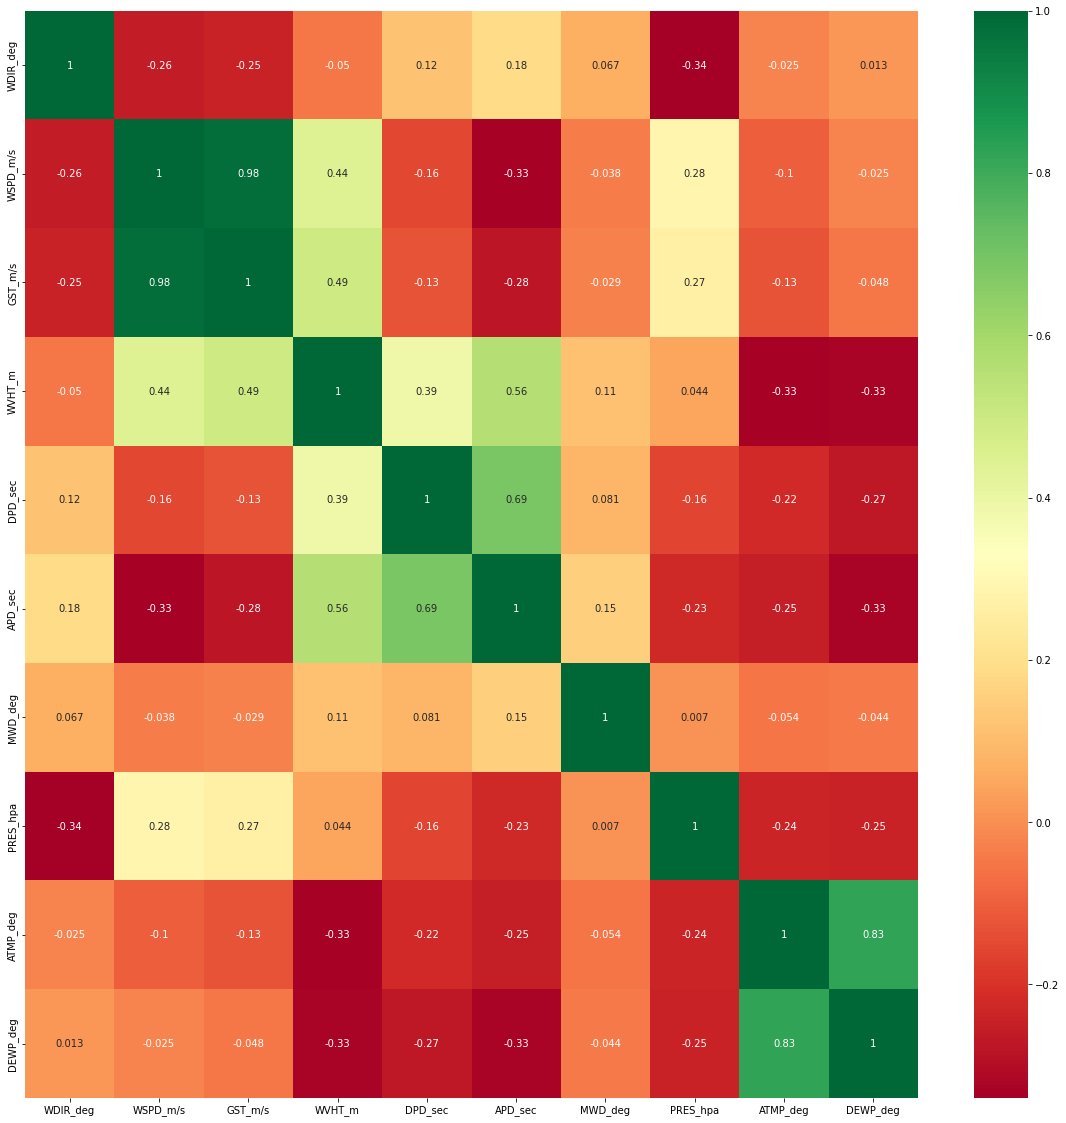

In [6]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:>

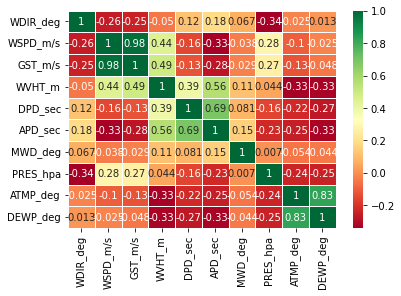

In [7]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn', annot=True, linewidth=0.5)

In [11]:
train.head()

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,DEWP_deg
0,2015-01-01 00:50:00,120,5.0,5.9,1.49,7.69,6.39,94,1022.2,26.0,21.7
1,2015-01-01 01:50:00,119,4.6,5.5,1.29,8.33,5.98,102,1022.4,25.9,21.7
2,2015-01-01 02:50:00,120,4.5,5.2,1.37,7.69,6.00,98,1022.4,25.9,21.8
3,2015-01-01 03:50:00,113,4.8,5.7,1.32,7.69,6.08,101,1022.0,25.8,22.0
4,2015-01-01 04:50:00,117,4.7,5.7,1.41,7.69,5.93,107,1021.7,25.8,21.8


In [12]:
Xtrain = train.iloc[:,[1,2,3,5,6,7,10]]
ytrain = train.iloc[:,4]

In [13]:
from sklearn.ensemble import RandomForestRegressor
greg=RandomForestRegressor()

In [14]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [15]:
from sklearn.model_selection import GridSearchCV
grid_search=[{'n_estimators':[1000,2000,4000,8000],'min_samples_leaf':[1,2,4,8,12], 
             'max_features':['auto','sqrt'], 'max_depth':[2,5,15,20,25], 'min_samples_split':[2,4,8,10,12], 'bootstrap':[True]}]

In [17]:
grid_search=GridSearchCV(greg, grid_search, cv=5, n_jobs=4,verbose = 2)


In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search=grid_search.fit(Xtrain,ytrain.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [12]:
grid_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 12,
 'min_samples_leaf': 12,
 'max_features': 'auto',
 'max_depth': 25}

In [13]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [14]:
display(random_search)

Best parameters are: {'n_estimators': 1000, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'auto', 'max_depth': 25}


0.805 + or -0.022 for the {'n_estimators': 2000, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 15}
0.802 + or -0.015 for the {'n_estimators': 2000, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 25}
0.471 + or -0.031 for the {'n_estimators': 4000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 2}
0.807 + or -0.023 for the {'n_estimators': 1000, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'auto', 'max_depth': 25}
0.803 + or -0.015 for the {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 15}
0.807 + or -0.023 for the {'n_estimators': 8000, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 15}
0.806 + or -0.023 for the {'n_estimat

In [15]:
random_search.best_estimator_

RandomForestRegressor(max_depth=25, min_samples_leaf=12, min_samples_split=12,
                      n_estimators=1000)

In [18]:
from sklearn.ensemble import RandomForestRegressor
greg=RandomForestRegressor(max_depth=25, min_samples_leaf=12, min_samples_split=12, n_estimators=1000)
greg.fit(Xtrain,ytrain)

RandomForestRegressor(max_depth=25, min_samples_leaf=12, min_samples_split=12,
                      n_estimators=1000)

In [19]:
y_pred = greg.predict(Xtrain)

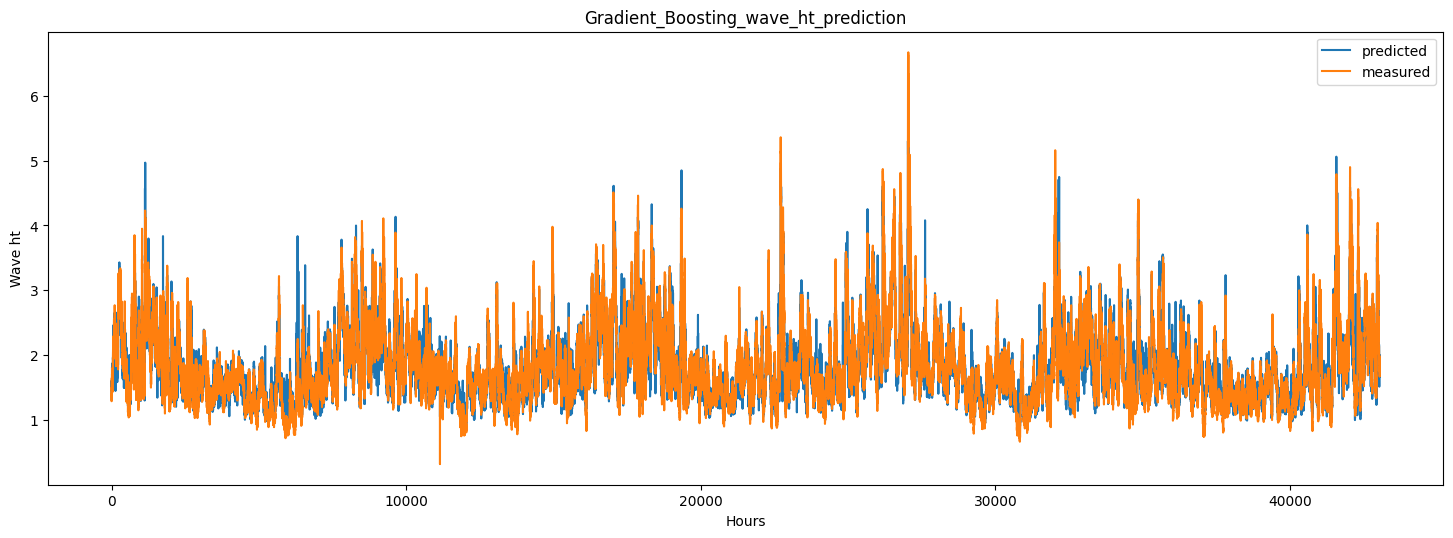

In [20]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(y_pred, label='predicted')
plt.plot( ytrain.ravel(), label='measured')
#plt.plot(y_pred, color='green', label='predicted')
plt.title('Gradient_Boosting_wave_ht_prediction')
plt.xlabel('Hours')
plt.ylabel('Wave ht')
plt.legend(loc='upper right')

In [21]:
from sklearn.metrics import r2_score
r2_score(ytrain,y_pred)

0.8993186248421815

In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,y_pred))

0.1883705732744845

In [32]:
test=pd.read_excel("41044h2020_testing.xlsx")

In [33]:
test

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,DEWP_deg
0,2020-01-01 00:40:00,84,7.3,8.6,1.90,10.81,6.39,27,1018.6,25.4,20.5
1,2020-01-01 01:40:00,97,6.4,8.1,1.89,10.00,6.54,20,1018.9,25.5,20.1
2,2020-01-01 02:40:00,103,6.3,7.9,1.82,10.00,6.50,24,1019.0,25.5,19.7
3,2020-01-01 03:40:00,100,6.3,8.1,1.69,13.79,6.35,29,1018.6,25.4,20.1
4,2020-01-01 04:40:00,59,6.9,8.7,1.87,10.00,6.46,25,1018.2,23.9,20.4
...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:40:00,35,10.6,13.1,2.56,6.67,6.00,36,1019.1,24.4,20.5
8780,2020-12-31 20:40:00,38,11.0,14.2,2.70,7.14,6.10,48,1019.4,24.4,20.2
8781,2020-12-31 21:40:00,39,11.6,15.4,3.03,7.14,6.31,34,1020.1,24.4,19.9
8782,2020-12-31 22:40:00,37,10.7,13.3,3.41,7.69,6.51,38,1020.7,24.4,19.6


In [34]:
Xtest=test.iloc[:,[1,2,3,5,6,7,10]]

In [35]:
Xtest

,WDIR_deg,WSPD_m/s,GST_m/s,DPD_sec,APD_sec,MWD_deg,DEWP_deg
0,84,7.3,8.6,10.81,6.39,27,20.5
1,97,6.4,8.1,10.00,6.54,20,20.1
2,103,6.3,7.9,10.00,6.50,24,19.7
3,100,6.3,8.1,13.79,6.35,29,20.1
4,59,6.9,8.7,10.00,6.46,25,20.4
...,...,...,...,...,...,...,...
8779,35,10.6,13.1,6.67,6.00,36,20.5
8780,38,11.0,14.2,7.14,6.10,48,20.2
8781,39,11.6,15.4,7.14,6.31,34,19.9
8782,37,10.7,13.3,7.69,6.51,38,19.6


In [38]:
ytest=test.iloc[:,[4]]

In [39]:
ytest

,WVHT_m
0,1.90
1,1.89
2,1.82
3,1.69
4,1.87
...,...
8779,2.56
8780,2.70
8781,3.03
8782,3.41


In [40]:
ytest_pred=greg.predict(Xtest)

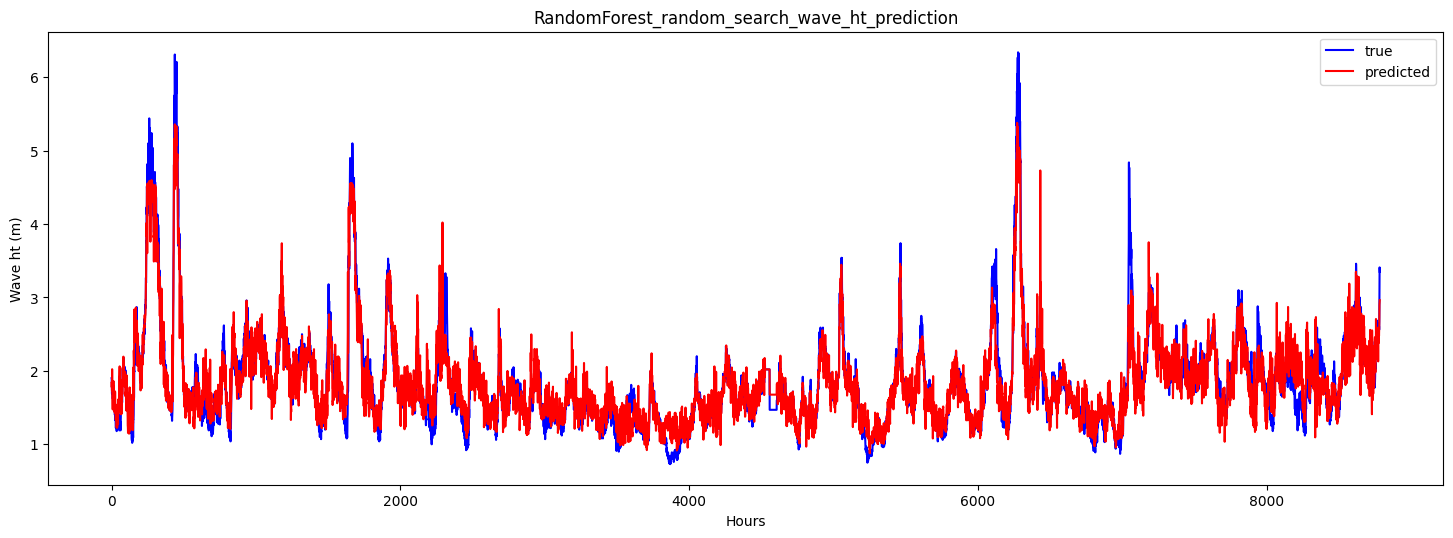

In [41]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(ytest, label='true', color='blue')
plt.plot(ytest_pred, label='predicted', color='red')

#plt.plot(y_pred, color='green', label='predicted')
plt.title('RandomForest_random_search_wave_ht_prediction')
plt.xlabel('Hours')
plt.ylabel('Wave ht (m)')
plt.legend(loc='upper right')

In [42]:
from sklearn.metrics import r2_score
r2_score(ytest,ytest_pred)

0.8644079672411036

In [43]:
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ytest_pred)

0.06200708595124147

In [45]:
math.sqrt(mean_squared_error(ytest,ytest_pred))

0.24901222048574537

In [46]:
ytest_pred=pd.DataFrame(ytest_pred)

In [47]:
ytest_pred

,0
0,1.790095
1,1.849743
2,1.832727
3,1.732335
4,2.023000
...,...
8779,2.579463
8780,2.664575
8781,2.899082
8782,2.934738


In [49]:
ytest_pred.to_excel("ytest_pred_grid_search.xlsx")

In [50]:
df1=pd.read_excel("ytest_pred_grid_search.xlsx")

In [51]:
df1

,Date,ytest_pred
0,2020-01-01 00:40:00,1.790095
1,2020-01-01 01:40:00,1.849743
2,2020-01-01 02:40:00,1.832727
3,2020-01-01 03:40:00,1.732335
4,2020-01-01 04:40:00,2.023000
...,...,...
8779,2020-12-31 19:40:00,2.579463
8780,2020-12-31 20:40:00,2.664575
8781,2020-12-31 21:40:00,2.899082
8782,2020-12-31 22:40:00,2.934738


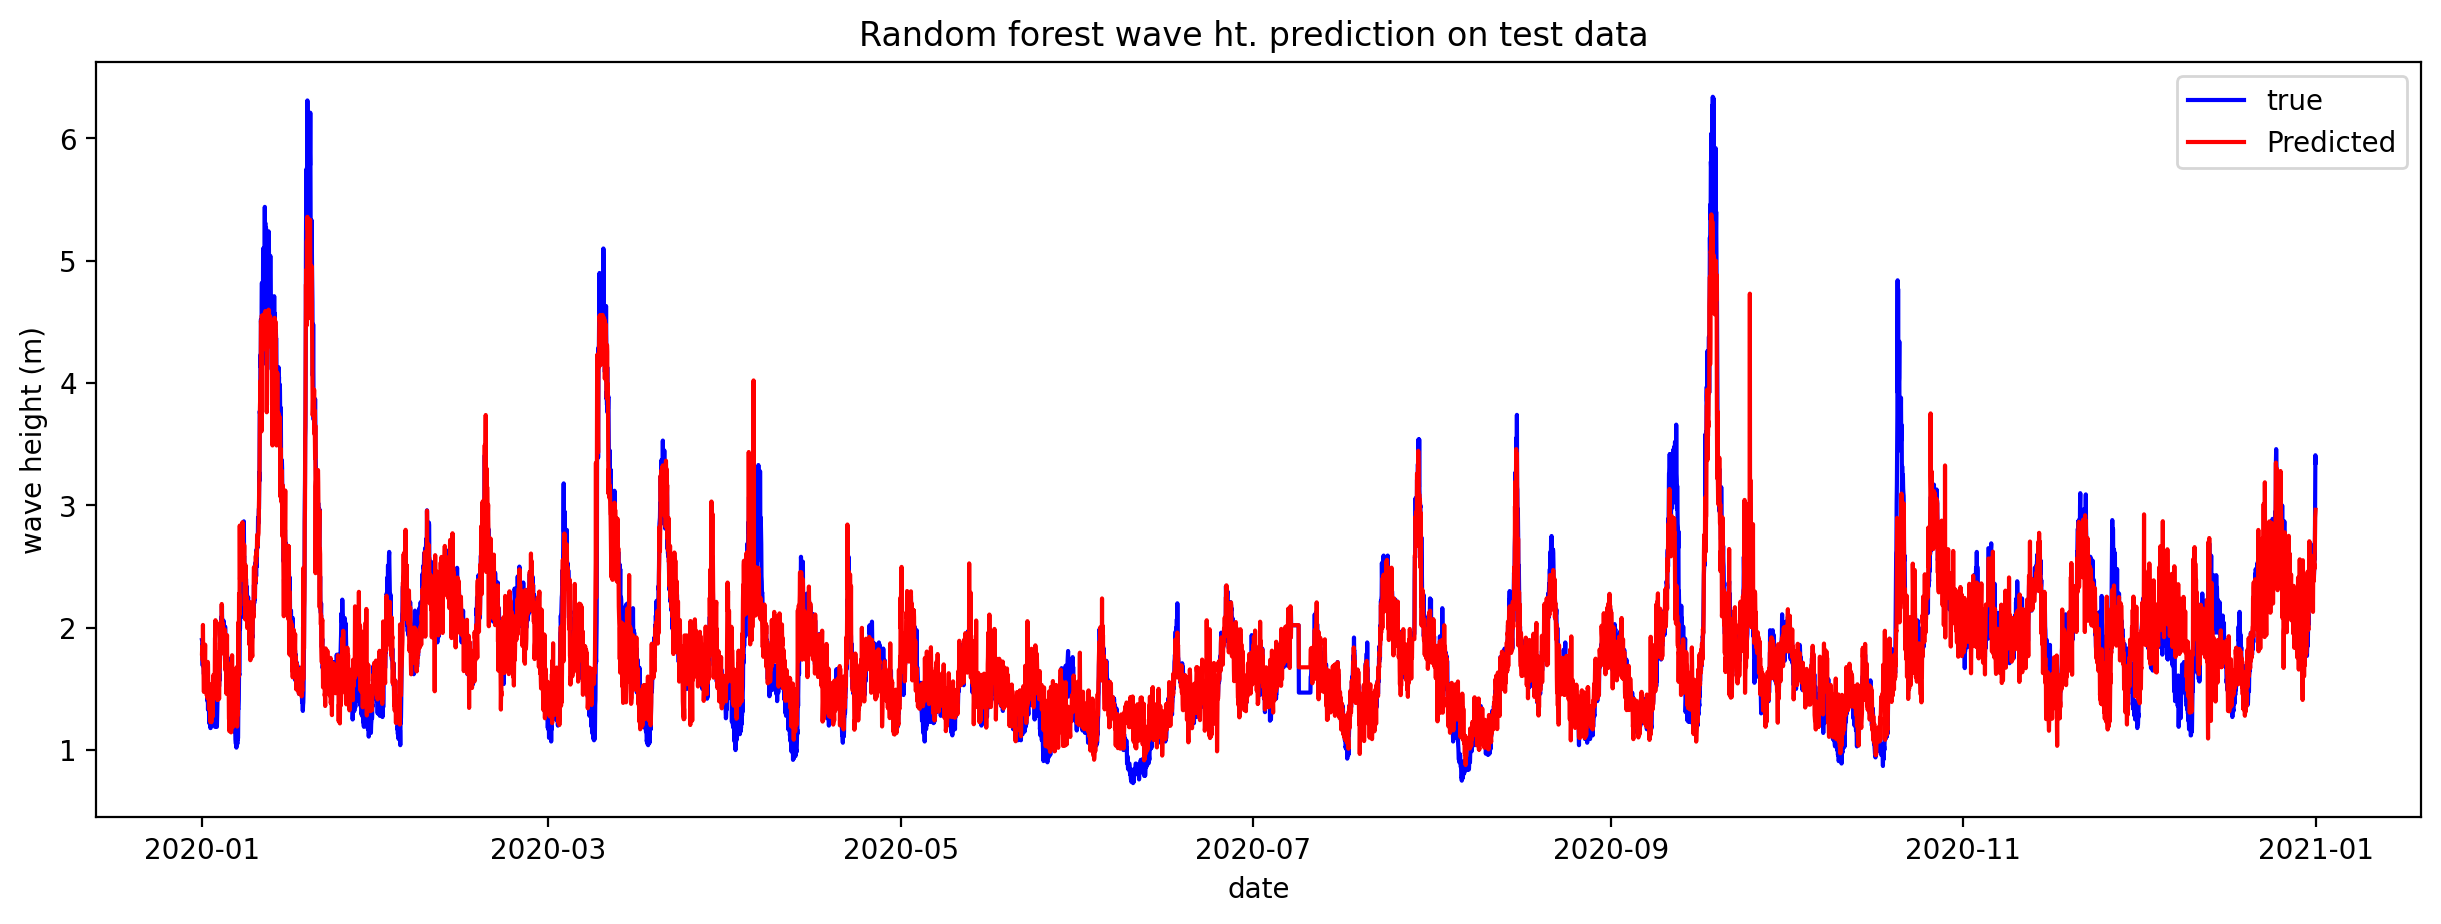

In [55]:
fig = plt.figure(figsize=(15, 5), dpi=200)
plt.plot(test['Date'],test['WVHT_m'], color='blue', label="true")
plt.plot(df1['Date'], df1['ytest_pred'], color='red',label="Predicted")

plt.title("Random forest wave ht. prediction on test data ")
plt.legend()
plt.xlabel("date")
plt.ylabel("wave height (m)")
plt.show()